In [18]:
# chuẩn hóa dữ liệu từ 3 file weather1.csv, weather2.csv, weather3.csv và gộp lại thành 1 file weather_cleaned.csv
import pandas as pd
import unicodedata
# Nguyễn Việt Quang B22DCCN650
# chuẩn hóa dữ liệu từ weather1.csv
df1 = pd.read_csv("DATA/weather1.csv")

df1 = df1.rename(columns={
    "province": "province",
    "date": "date",
    "max": "temp_max",
    "min": "temp_min",
    "wind": "wind_speed",
    "rain": "precipitation",
    "humidi": "humidity"
})

df1 = df1[["province", "date", "temp_max", "temp_min", "wind_speed", "precipitation", "humidity"]]

# Nguyễn Việt Quang B22DCCN650
# chuẩn hóa dữ liệu từ weather2.csv
df2 = pd.read_csv("DATA/weather2.csv")

df2 = df2.rename(columns={
    "province": "province",
    "time": "date",            # bạn yêu cầu date là time
    "temp_max": "temp_max",
    "temp_min": "temp_min",
    "wind_speed": "wind_speed",
    "precipitation": "precipitation",
    "humidity": "humidity"
})

df2 = df2[["province", "date", "temp_max", "temp_min", "wind_speed", "precipitation", "humidity"]]

# Nguyễn Việt Quang B22DCCN650
# chuẩn hóa dữ liệu từ weather3.csv
df3 = pd.read_csv("DATA/weather3.csv")

df3 = df3.rename(columns={
    "location.name": "province",
    "date": "date",
    "day.maxtemp_c": "temp_max",
    "day.mintemp_c": "temp_min",
    "day.maxwind_kph": "wind_speed",
    "day.totalprecip_mm": "precipitation",
    "day.avghumidity": "humidity"
})

df3 = df3[["province", "date", "temp_max", "temp_min", "wind_speed", "precipitation", "humidity"]]

# Nguyễn Việt Quang B22DCCN650
# Chuyển toàn bộ về datetime
df1["date"] = pd.to_datetime(df1["date"], errors="coerce")
df2["date"] = pd.to_datetime(df2["date"], errors="coerce")
df3["date"] = pd.to_datetime(df3["date"], errors="coerce")

# Chuẩn hóa lại định dạng yyyy-mm-dd
df1["date"] = df1["date"].dt.strftime("%Y-%m-%d")
df2["date"] = df2["date"].dt.strftime("%Y-%m-%d")
df3["date"] = df3["date"].dt.strftime("%Y-%m-%d")

# Nguyễn Việt Quang B22DCCN650
# gộp 3 file lại
df = pd.concat([df1, df2, df3], ignore_index=True)

# chuẩn hóa cột province
# Nguễn Việt Quang B22DCCN650
import unicodedata

SPECIAL_MAP = {
    "TP HO CHI MINH": "HO CHI MINH",
    "TP. HO CHI MINH": "HO CHI MINH",
    "HO CHI MINH CITY": "HO CHI MINH",
    "HANOI": "HA NOI",
    "DA NANG": "DA NANG",
    "ĐA NANG": "DA NANG"
}

def remove_accents(text):
    text = unicodedata.normalize("NFD", text)
    return ''.join(c for c in text if unicodedata.category(c) != 'Mn')

def normalize_province(value):
    if not isinstance(value, str):
        return value

    # 1. Bỏ dấu + uppercase
    v = remove_accents(value).upper().strip()

    # 2. Nếu có dạng "TINH-THANH PHO", lấy phần TỈNH
    v = v.split("-")[0].strip()

    # 3. Chuẩn hóa trường hợp đặc biệt
    if v in SPECIAL_MAP:
        v = SPECIAL_MAP[v]

    return v

df["province"] = df["province"].apply(normalize_province)

# xử lý các dùng có trùng khu vực mà trùng ngày luôn
df = df.drop_duplicates(subset=["province", "date"], keep="first").reset_index(drop=True)

# chỉ dữ lại khu vục HO CHI MINH, HA NOI, DA NANG
df = df[df["province"].isin(["HO CHI MINH", "HA NOI", "DA NANG"])].reset_index(drop=True)


# lưu file đã chuẩn hóa
df.to_csv("DATA/weather_cleaned.csv", index=False)




Shape X: (12468, 14, 8) Shape y: (12468,) Unique provinces: 3
Train: (9974, 14, 8) (9974,) Test: (2494, 14, 8) (2494,)
Classes: [0 1 2 3]


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 14, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (SimpleRNN)               │ (None, 14, 128)        │        17,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 14, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_2 (SimpleRNN)               │ (None, 14, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 14, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_3 (SimpleRNN)               │ (None, 14, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 14, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_4 (SimpleRNN)               │ (None, 14, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 14, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_5 (SimpleRNN)               │ (None, 14, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 14, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_6 (SimpleRNN)               │ (None, 14, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 14, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_7 (SimpleRNN)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out (Dense)                     │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,500 (884.77 KB)

 Trainable params: 224,964 (878.77 KB)

 Non-trainable params: 1,536 (6.00 KB)

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 14, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 14, 128)        │        70,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 14, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 14, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 14, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 14, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_56          │ (None, 14, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 14, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_57          │ (None, 14, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 14, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_58          │ (None, 14, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 14, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_59          │ (None, 14, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out (Dense)                     │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 871,236 (3.32 MB)

 Trainable params: 869,700 (3.32 MB)

 Non-trainable params: 1,536 (6.00 KB)

class_weight: {0: np.float64(0.6708366962604251), 1: np.float64(1.0989422653151169), 2: np.float64(1.1176602420439266), 3: np.float64(1.419180421172453)}
Epoch 1/18


141/141 - 20s - 144ms/step - accuracy: 0.4072 - loss: 1.3196 - val_accuracy: 0.5190 - val_loss: 1.1000
Epoch 2/18


141/141 - 6s - 44ms/step - accuracy: 0.4656 - loss: 1.2100 - val_accuracy: 0.5822 - val_loss: 0.9407
Epoch 3/18
141/141 - 6s - 44ms/step - accuracy: 0.4874 - loss: 1.1613 - val_accuracy: 0.5451 - val_loss: 0.9628
Epoch 4/18


141/141 - 6s - 43ms/step - accuracy: 0.5028 - loss: 1.1381 - val_accuracy: 0.5912 - val_loss: 0.9159
Epoch 5/18


141/141 - 10s - 73ms/step - accuracy: 0.5238 - loss: 1.1042 - val_accuracy: 0.5922 - val_loss: 0.8991
Epoch 6/18


141/141 - 6s - 45ms/step - accuracy: 0.5219 - loss: 1.0841 - val_accuracy: 0.5942 - val_loss: 0.8741
Epoch 7/18


141/141 - 10s - 71ms/step - accuracy: 0.5323 - loss: 1.0626 - val_accuracy: 0.6012 - val_loss: 0.8766
Epoch 8/18
141/141 - 6s - 42ms/step - accuracy: 0.5384 - loss: 1.0458 - val_accuracy: 0.5992 - val_loss: 0.8809
Epoch 9/18
141/141 - 6s - 43ms/step - accuracy: 0.5348 - loss: 1.0388 - val_accuracy: 0.5912 - val_loss: 0.8585
Epoch 10/18
141/141 - 10s - 73ms/step - accuracy: 0.5553 - loss: 1.0184 - val_accuracy: 0.6012 - val_loss: 0.8851
Epoch 11/18
141/141 - 10s - 73ms/step - accuracy: 0.5488 - loss: 1.0238 - val_accuracy: 0.5932 - val_loss: 0.8704
Epoch 12/18
141/141 - 10s - 72ms/step - accuracy: 0.5429 - loss: 1.0122 - val_accuracy: 0.6002 - val_loss: 0.8823
Epoch 13/18
141/141 - 10s - 73ms/step - accuracy: 0.5427 - loss: 1.0211 - val_accuracy: 0.5912 - val_loss: 0.8579
Epoch 14/18


141/141 - 6s - 43ms/step - accuracy: 0.5428 - loss: 1.0060 - val_accuracy: 0.6082 - val_loss: 0.8603
Epoch 15/18
141/141 - 6s - 42ms/step - accuracy: 0.5427 - loss: 1.0204 - val_accuracy: 0.5872 - val_loss: 0.8391
Epoch 16/18
141/141 - 6s - 42ms/step - accuracy: 0.5538 - loss: 1.0030 - val_accuracy: 0.6002 - val_loss: 0.8540
Epoch 17/18
141/141 - 10s - 74ms/step - accuracy: 0.5543 - loss: 0.9996 - val_accuracy: 0.5832 - val_loss: 0.8542
Epoch 18/18
141/141 - 6s - 42ms/step - accuracy: 0.5539 - loss: 1.0003 - val_accuracy: 0.5992 - val_loss: 0.8572
Epoch 1/18


141/141 - 32s - 230ms/step - accuracy: 0.4261 - loss: 1.2744 - val_accuracy: 0.5230 - val_loss: 1.1124
Epoch 2/18


141/141 - 17s - 120ms/step - accuracy: 0.4583 - loss: 1.2060 - val_accuracy: 0.5291 - val_loss: 1.0551
Epoch 3/18
141/141 - 20s - 144ms/step - accuracy: 0.4676 - loss: 1.1729 - val_accuracy: 0.5271 - val_loss: 1.0100
Epoch 4/18
141/141 - 17s - 123ms/step - accuracy: 0.4813 - loss: 1.1480 - val_accuracy: 0.5261 - val_loss: 1.0100
Epoch 5/18
141/141 - 17s - 123ms/step - accuracy: 0.4755 - loss: 1.1466 - val_accuracy: 0.5170 - val_loss: 0.9911
Epoch 6/18
141/141 - 20s - 144ms/step - accuracy: 0.4899 - loss: 1.1334 - val_accuracy: 0.5220 - val_loss: 0.9847
Epoch 7/18
141/141 - 18s - 126ms/step - accuracy: 0.4859 - loss: 1.1250 - val_accuracy: 0.5170 - val_loss: 0.9990
Epoch 8/18
141/141 - 17s - 122ms/step - accuracy: 0.4890 - loss: 1.1179 - val_accuracy: 0.5190 - val_loss: 0.9917


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step
RNN Test Accuracy: 0.5854
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       930
           1       0.47      0.57      0.51       567
           2       0.35      0.16      0.22       558
           3       0.48      0.81      0.60       439

    accuracy                           0.59      2494
   macro avg       0.54      0.57      0.53      2494
weighted avg       0.59      0.59      0.57      2494

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step
LSTM Test Accuracy: 0.5237
Classification report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       930
           1       0.47      0.47      0.47       567
           2       0.34      0.16      0.22       558
           3       0.41      0.82      0.55       439

    accuracy                           0.52      2494
   macro avg       0.49      0.52      0.48      2494
weigh

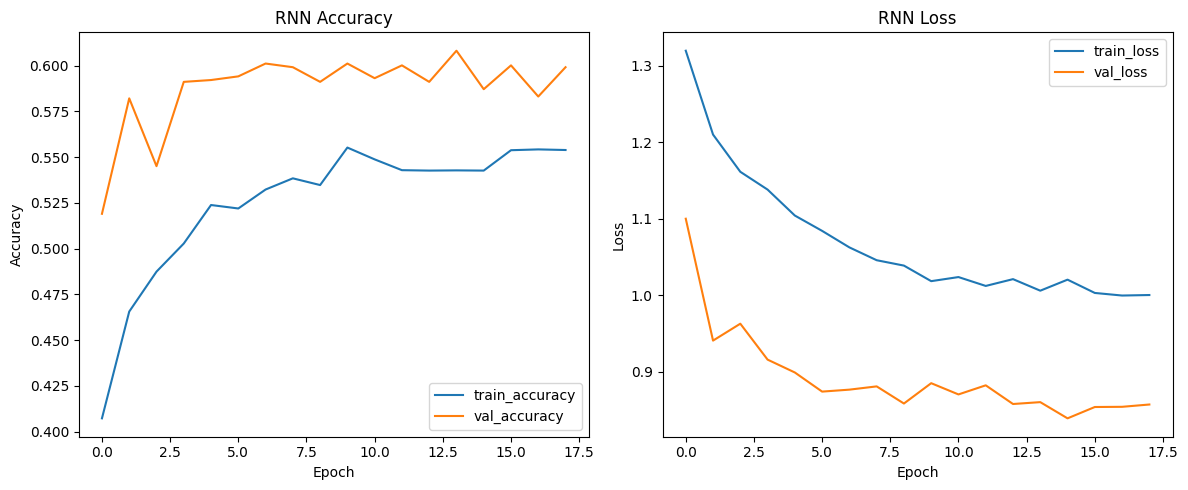

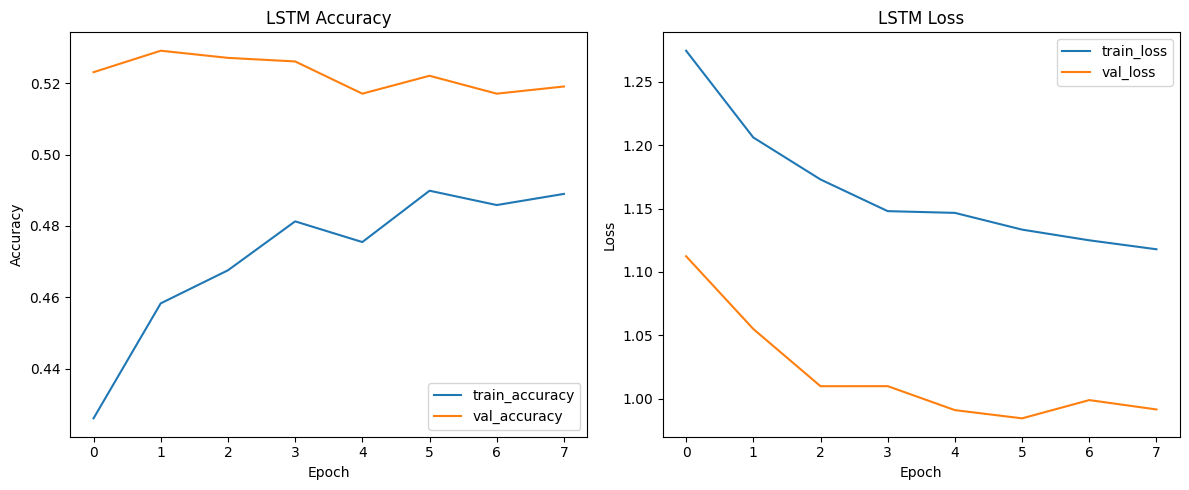

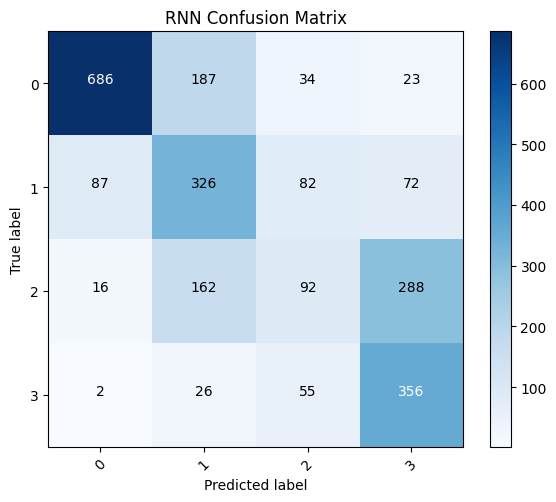

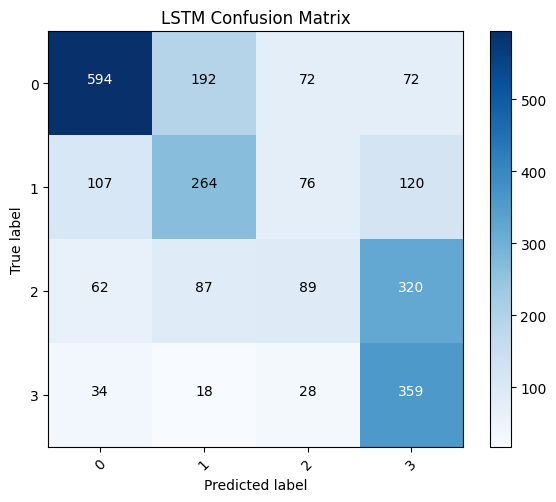

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Next-day predictions saved to results_weather_models


In [20]:
# file: train_weather_seq_models.py
# Chạy trên máy của bạn (Python 3.8+). Trước khi chạy, pip install pandas numpy scikit-learn tensorflow matplotlib

# Nguyễn Việt Quang B22DCCN650
import os
import numpy as np
import pandas as pd
from datetime import timedelta
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, utils
import matplotlib.pyplot as plt
import itertools
import joblib

# -----------------------
# 1. Params (điều chỉnh nếu cần)
# # Nguyễn Việt Quang B22DCCN650
DATA_PATH = "DATA/weather_cleaned.csv"
RESULT_DIR = "results_weather_models"
os.makedirs(RESULT_DIR, exist_ok=True)

SEQUENCE_LENGTH = 14    # dùng 14 ngày để dự đoán ngày tiếp theo
PRED_STEPS = 1          # dự báo 1 bước (next day). mở rộng nếu cần.
TEST_SIZE = 0.2
RANDOM_STATE = 42
BATCH_SIZE = 64
EPOCHS = 18             # sửa nếu muốn nhiều hơn
LEARNING_RATE = 1e-3

# -----------------------
# 2. Utility: create weather_type label from precipitation
# Nguyễn Việt Quang B22DCCN650
def make_weather_type(precip_mm):
    # 0: no rain, 1: light (<2mm), 2: moderate (2-10), 3: heavy (>=10)
    if pd.isna(precip_mm):
        return 0
    if precip_mm == 0:
        return 0
    if precip_mm < 2:
        return 1
    if precip_mm < 10:
        return 2
    return 3

# -----------------------
# 3. Load & preprocess
# Nguyễn Việt Quang B22DCCN650
df = pd.read_csv(DATA_PATH, parse_dates=["date"])
# ensure columns exist
required_cols = ["province","date","temp_max","temp_min","wind_speed","precipitation","humidity"]
for c in required_cols:
    if c not in df.columns:
        raise ValueError(f"Thiếu cột {c} trong {DATA_PATH}")

# Drop rows with missing province or date
df = df.dropna(subset=["province","date"]).copy()

# Convert date to datetime (if not)
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

# Sort
df = df.sort_values(["province","date"]).reset_index(drop=True)

# Make weather_type label
df['weather_type'] = df['precipitation'].apply(make_weather_type).astype(int)

# Optionally: fill missing numeric features with forward fill per province then global mean
num_cols = ["temp_max","temp_min","wind_speed","precipitation","humidity"]
df[num_cols] = df.groupby("province")[num_cols].transform(lambda x: x.ffill().bfill())
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# -----------------------
# 4. Reindex time series per province to ensure continuous dates (daily)
# Nguyễn Việt Quang B22DCCN650
# This helps when some provinces miss dates; we will forward-fill features (or keep NaN handling policy).
provinces = df['province'].unique().tolist()
rows = []
for p in provinces:
    g = df[df['province']==p].set_index('date').sort_index()
    if g.empty:
        continue
    # create full date index from min to max
    full_idx = pd.date_range(g.index.min(), g.index.max(), freq='D')
    g = g.reindex(full_idx)
    # fill province column
    g['province'] = p
    # forward fill numeric then backfill
    g[num_cols] = g[num_cols].ffill().bfill()
    # weather_type: if still NaN use 0 (no rain) as conservative default
    g['weather_type'] = g['weather_type'].fillna(0).astype(int)
    g = g.reset_index().rename(columns={'index':'date'})
    rows.append(g[['province','date'] + num_cols + ['weather_type']])

df_full = pd.concat(rows, ignore_index=True)
df = df_full.copy()

# -----------------------
# 5. Feature engineering: create additional features if desired
# Nguyễn Việt Quang B22DCCN650
# -----------------------
# Example: temp_avg, day_of_year, month, lag features can be created in sequence stage
df['temp_avg'] = (df['temp_max'] + df['temp_min']) / 2
df['day_of_year'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month

feature_cols = ["temp_max","temp_min","temp_avg","wind_speed","precipitation","humidity","day_of_year","month"]

# -----------------------
# 6. Normalize numeric features (fit scaler on train later)
# -----------------------
# We'll create sequences per province and then split train/test by time globally

# -----------------------
# 7. Create sequences (X, y) per province using sliding window
# Nguyễn Việt Quang B22DCCN650
def create_sequences_for_province(gdf, seq_len=SEQUENCE_LENGTH, pred_steps=PRED_STEPS, feature_cols=feature_cols, target_col='weather_type'):
    """
    gdf: df for single province sorted by date
    returns list of (X_seq, y_target)
    X_seq shape: (seq_len, n_features)
    y_target: integer class of next day (or next pred_steps aggregated)
    """
    Xs, ys = [], []
    arr_feat = gdf[feature_cols].values
    arr_target = gdf[target_col].values
    n = len(gdf)
    for i in range(n - seq_len - pred_steps + 1):
        X_seq = arr_feat[i:i+seq_len]
        # target is weather_type at step i+seq_len (next day)
        y = arr_target[i+seq_len]   # single-step
        Xs.append(X_seq)
        ys.append(y)
    return np.array(Xs), np.array(ys)

# build across provinces
X_list, y_list = [], []
province_index = []
for p in provinces:
    g = df[df['province']==p].sort_values('date').reset_index(drop=True)
    if len(g) < SEQUENCE_LENGTH + PRED_STEPS:
        continue
    Xp, yp = create_sequences_for_province(g, seq_len=SEQUENCE_LENGTH, pred_steps=PRED_STEPS,
                                          feature_cols=feature_cols, target_col='weather_type')
    if len(Xp) == 0:
        continue
    X_list.append(Xp)
    y_list.append(yp)
    province_index.extend([p]*len(yp))

if len(X_list) == 0:
    raise ValueError("Không đủ dữ liệu để tạo sequence. Giảm SEQUENCE_LENGTH hoặc đảm bảo có đủ ngày.")

X = np.vstack(X_list)
y = np.concatenate(y_list)
province_index = np.array(province_index)

print("Shape X:", X.shape, "Shape y:", y.shape, "Unique provinces:", len(np.unique(province_index)))

# -----------------------
# 8. Train-test split (time-aware): we already used sliding windows from each province (so we'll split randomly but stratify by class)
#    If you prefer time split per province: implement a per-province last N days as test.
# Nguyễn Việt Quang B22DCCN650
# do stratified split by class
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=TEST_SIZE, random_state=RANDOM_STATE)
train_idx, test_idx = next(sss.split(X, y))
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]
prov_train, prov_test = province_index[train_idx], province_index[test_idx]

print("Train:", X_train.shape, y_train.shape, "Test:", X_test.shape, y_test.shape)

# -----------------------
# 9. Scale features: fit scaler on flattened training features then apply per time-step
# Nguyễn Việt Quang B22DCCN650
n_features = X_train.shape[2]
scaler = StandardScaler()
# fit on 2D data: (n_samples*seq_len, n_features)
scaler.fit(X_train.reshape(-1, n_features))
# transform
def scale_X(X_in):
    s = scaler.transform(X_in.reshape(-1, n_features)).reshape(X_in.shape)
    return s

X_train_scaled = scale_X(X_train)
X_test_scaled = scale_X(X_test)

# save scaler
joblib.dump(scaler, os.path.join(RESULT_DIR, "scaler.save"))

# -----------------------
# 10. Encode labels
# Nguyễn Việt Quang B22DCCN650
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
num_classes = len(le.classes_)
print("Classes:", le.classes_)

# save label encoder
joblib.dump(le, os.path.join(RESULT_DIR, "label_encoder.save"))

# convert to categorical for training
y_train_cat = utils.to_categorical(y_train_enc, num_classes=num_classes)
y_test_cat = utils.to_categorical(y_test_enc, num_classes=num_classes)

# -----------------------
# 11. Build models (>=7 layers)
# We'll create two models:
#   - RNN_multi: stacked SimpleRNN with 7 recurrent layers (return_sequences=True for stacking)
#   - LSTM_multi: stacked LSTM with 7 recurrent layers
# Each model ends with Dense layers for classification.
# -----------------------
# Nguyễn Việt Quang B22DCCN650
def build_rnn_model(input_shape, num_classes, recurrent_type='simple', n_recur_layers=7, units=64, dropout=0.2):
    inp = layers.Input(shape=input_shape, name='input')
    x = inp
    for i in range(n_recur_layers):
        # For stacking, all but last must return_sequences=True
        is_last = (i == n_recur_layers - 1)
        if recurrent_type == 'simple':
            x = layers.SimpleRNN(units, return_sequences=not is_last, dropout=dropout, name=f"rnn_{i+1}")(x)
        elif recurrent_type == 'gru':
            x = layers.GRU(units, return_sequences=not is_last, dropout=dropout, name=f"gru_{i+1}")(x)
        elif recurrent_type == 'lstm':
            x = layers.LSTM(units, return_sequences=not is_last, dropout=dropout, name=f"lstm_{i+1}")(x)
        else:
            raise ValueError("Unknown recurrent_type")
        # optionally batchnorm
        if not is_last:
            x = layers.BatchNormalization()(x)
    # Dense head
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    out = layers.Dense(num_classes, activation='softmax', name='out')(x)
    model = models.Model(inp, out)
    return model

# Nguyễn Việt Quang B22DCCN650
# build rnn (SimpleRNN)
input_shape = (SEQUENCE_LENGTH, n_features)
rnn_model = build_rnn_model(input_shape, num_classes, recurrent_type='simple', n_recur_layers=7, units=128)
rnn_model.compile(optimizer=tf.keras.optimizers.Adam(LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
rnn_model.summary()

# build lstm
lstm_model = build_rnn_model(input_shape, num_classes, recurrent_type='lstm', n_recur_layers=7, units=128)
lstm_model.compile(optimizer=tf.keras.optimizers.Adam(LEARNING_RATE),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
lstm_model.summary()

# -----------------------
# 12. Training callbacks
# Nguyễn Việt Quang B22DCCN650
checkpoint_rnn = callbacks.ModelCheckpoint(os.path.join(RESULT_DIR, "rnn_best.h5"),
                                           monitor='val_accuracy', save_best_only=True, mode='max')
checkpoint_lstm = callbacks.ModelCheckpoint(os.path.join(RESULT_DIR, "lstm_best.h5"),
                                           monitor='val_accuracy', save_best_only=True, mode='max')
es = callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# class weights (help if classes imbalanced)
from sklearn.utils.class_weight import compute_class_weight
class_weights_vals = compute_class_weight('balanced', classes=np.unique(y_train_enc), y=y_train_enc)
class_weight = {i: w for i, w in enumerate(class_weights_vals)}
print("class_weight:", class_weight)

# -----------------------
# 13. Fit models (you can train one at a time if GPU limited)
# -----------------------
history_rnn = rnn_model.fit(
    X_train_scaled, y_train_cat,
    validation_split=0.1,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[checkpoint_rnn, es],
    class_weight=class_weight,
    verbose=2
)

# Nguyễn Việt Quang B22DCCN650
history_lstm = lstm_model.fit(
    X_train_scaled, y_train_cat,
    validation_split=0.1,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[checkpoint_lstm, es],
    class_weight=class_weight,
    verbose=2
)

# Save final models
rnn_model.save(os.path.join(RESULT_DIR, "rnn_final.h5"))
lstm_model.save(os.path.join(RESULT_DIR, "lstm_final.h5"))

# Save training history
pd.DataFrame(history_rnn.history).to_csv(os.path.join(RESULT_DIR, "history_rnn.csv"), index=False)
pd.DataFrame(history_lstm.history).to_csv(os.path.join(RESULT_DIR, "history_lstm.csv"), index=False)

# -----------------------
# 14. Evaluate on test set
# Nguyễn Việt Quang B22DCCN650
def eval_and_report(model, X_test, y_test_enc, le, title="model"):
    preds = model.predict(X_test, batch_size=128)
    y_pred = np.argmax(preds, axis=1)
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    acc = accuracy_score(y_test_enc, y_pred)
    print(f"{title} Test Accuracy: {acc:.4f}")
    print("Classification report:")
    print(classification_report(y_test_enc, y_pred, target_names=[str(x) for x in le.classes_]))
    cm = confusion_matrix(y_test_enc, y_pred)
    return acc, cm, y_pred

acc_rnn, cm_rnn, y_pred_rnn = eval_and_report(rnn_model, X_test_scaled, y_test_enc, le, title="RNN")
acc_lstm, cm_lstm, y_pred_lstm = eval_and_report(lstm_model, X_test_scaled, y_test_enc, le, title="LSTM")

# vẽ biểu đồ accuracy và loss
# Nguyễn Việt Quang B22DCCN650
def plot_history(history, title, result_dir):
    plt.figure(figsize=(12,5))
    # accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    # loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(result_dir, f"{title}_training_history.png"))
    plt.show()
plot_history(history_rnn, "RNN", RESULT_DIR)
plot_history(history_lstm, "LSTM", RESULT_DIR)

# plot confusion matrix helper
def plot_confusion_matrix(cm, classes, title, normalize=False):
    plt.figure(figsize=(6,5))
    if normalize:
        cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        disp = cmn
    else:
        disp = cm
    plt.imshow(disp, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = disp.max() / 2.
    for i, j in itertools.product(range(disp.shape[0]), range(disp.shape[1])):
        plt.text(j, i, format(disp[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if disp[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(os.path.join(RESULT_DIR, f"confusion_{title}.png"))
    plt.show()

plot_confusion_matrix(cm_rnn, le.classes_, "RNN Confusion Matrix", normalize=False)
plot_confusion_matrix(cm_lstm, le.classes_, "LSTM Confusion Matrix", normalize=False)

# -----------------------
# 15. Example: make next-day predictions per province
# Nguyễn Việt Quang B22DCCN650
# We'll take the last SEQUENCE_LENGTH days for each province and predict next day weather_type
def predict_next_day_all_provinces(model, df, feature_cols, scaler, seq_len=SEQUENCE_LENGTH):
    preds = {}
    for p in df['province'].unique():
        g = df[df['province']==p].sort_values('date').reset_index(drop=True)
        if len(g) < seq_len:
            continue
        last_seq = g[feature_cols].values[-seq_len:]
        last_seq_scaled = scaler.transform(last_seq).reshape(1, seq_len, -1)
        prob = model.predict(last_seq_scaled)[0]
        pred_class = np.argmax(prob)
        preds[p] = {"pred_class": int(pred_class), "prob": prob.tolist()}
    return preds

preds_rnn = predict_next_day_all_provinces(rnn_model, df, feature_cols, scaler)
preds_lstm = predict_next_day_all_provinces(lstm_model, df, feature_cols, scaler)

# Save predictions
import json
with open(os.path.join(RESULT_DIR, "next_day_preds_rnn.json"), "w") as f:
    json.dump(preds_rnn, f, indent=2, ensure_ascii=False)
with open(os.path.join(RESULT_DIR, "next_day_preds_lstm.json"), "w") as f:
    json.dump(preds_lstm, f, indent=2, ensure_ascii=False)

print("Next-day predictions saved to", RESULT_DIR)

# -----------------------
# 16. Notes, potential improvements
# -----------------------
# - Bạn có thể điều chỉnh SEQUENCE_LENGTH, units, dropout, EPOCHS, batch_size.
# - Multi-step forecasting: để dự báo nhiều ngày tiếp theo, thay target thành sequence hoặc dùng seq2seq.
# - Nên cân nhắc thêm các feature: pressure, cloud, wind_direction nếu có sau này.
# - Với lượng dữ liệu lớn, sử dụng GPU (tensorflow) để tăng tốc.
# - Nếu muốn dự báo theo tỉnh chính xác hơn, map các thành phố về tỉnh trước (mình có thể giúp map).
# -----------------------
